## Project on Feature Selection

In this project I will use different techniques of feature selection.
Feature Selection is basically selecting the best features for our model.

#### Techniques:
SelectKBest.
Correlation.
Mutual information classification.

For the EDA part I will be using automated EDA.

In [1]:
# importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder # encoder for catrgorical features
from ydata_profiling import ProfileReport # pandas_profiling for automated eda
import sweetviz as sv # sweetviz for automated eda
import dtale # automated eda library dtale
import matplotlib.pyplot as plt # matplotlib for plotting graphs
# to display charts
%matplotlib inline 
from autoviz import AutoViz_Class # autoviz an automated eda library
AV = AutoViz_Class()

C:\Users\AJAY\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\AJAY\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Imported v0.1.730. After importing autoviz, execute '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
# reading csv
df = pd.read_csv('D:\Dataset\cardio_data_processed.csv.zip')

In [5]:
# making a copy of the dataframe df so that we won't alter it
dc = df.copy()
dc

id     age   gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393     2      168     62.0   110     80        1         1    
1          1  20228     1      156     85.0   140     90        3         1    
2          2  18857     1      165     64.0   130     70        3         1    
3          3  17623     2      169     82.0   150    100        1         1    
4          4  17474     1      156     56.0   100     60        1         1    
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240     2      168     76.0   120     80        1         1    
68201  99995  22601     1      158    126.0   140     90        2         2    
68202  99996  19066     2      183    105.0   180     90        3         1    
68203  99998  22431     1      163     72.0   135     80        1         2    
68204  99999  20540     1      170     72.0   120     80        2         1    

       smoke  alco  active  cardio  age_years     bmi     \
0        0      0      1       0       50      21.967120   
1        0      0      1       1       55      34.927679   
2        0      0      0       1       51      23.507805   
3        0      0      1       1       48      28.710479   
4        0      0      0       0       47      23.011177   
...      ...   ...     ...     ...        ...        ...   
68200    1      0      1       0       52      26.927438   
68201    0      0      1       1       61      50.472681   
68202    0      1      0       1       52      31.353579   
68203    0      0      0       1       61      27.099251   
68204    0      0      1       0       56      24.913495   

           bp_category       bp_category_encoded   
0      Hypertension Stage 1  Hypertension Stage 1  
1      Hypertension Stage 2  Hypertension Stage 2  
2      Hypertension Stage 1  Hypertension Stage 1  
3      Hypertension Stage 2  Hypertension Stage 2  
4                    Normal                Normal  
...                     ...                   ...  
68200  Hypertension Stage 1  Hypertension Stage 1  
68201  Hypertension Stage 2  Hypertension Stage 2  
68202  Hypertension Stage 2  Hypertension Stage 2  
68203  Hypertension Stage 1  Hypertension Stage 1  
68204  Hypertension Stage 1  Hypertension Stage 1  

[68205 rows x 17 columns]

## Automated EDA

In [6]:
# Using autoviz library
# converting dataframe to csv for autoviz
dc.to_csv('dfav.csv')

Shape of your Data Set loaded: (68205, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    18 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0', 'id']
To fix data quality issues automatically, import FixDQ from autoviz...


Number of All Scatter Plots = 3


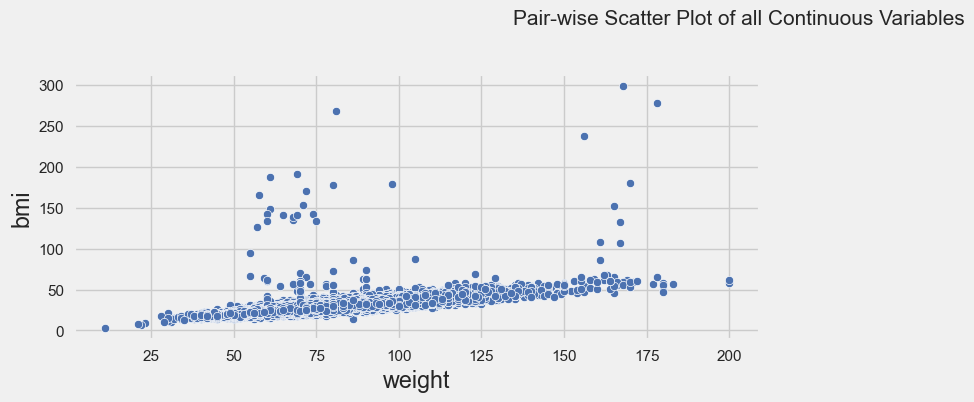

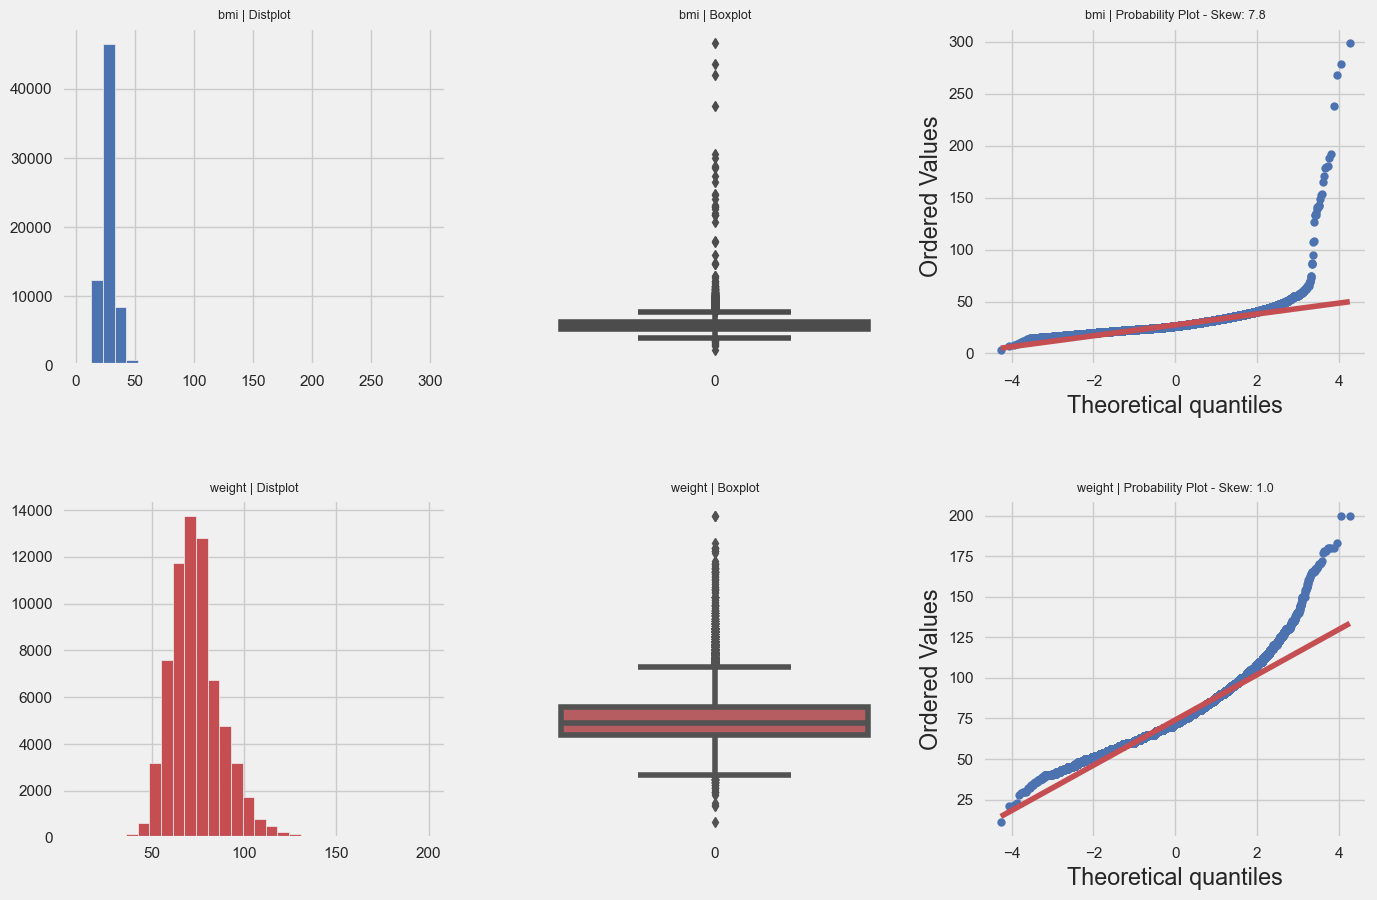

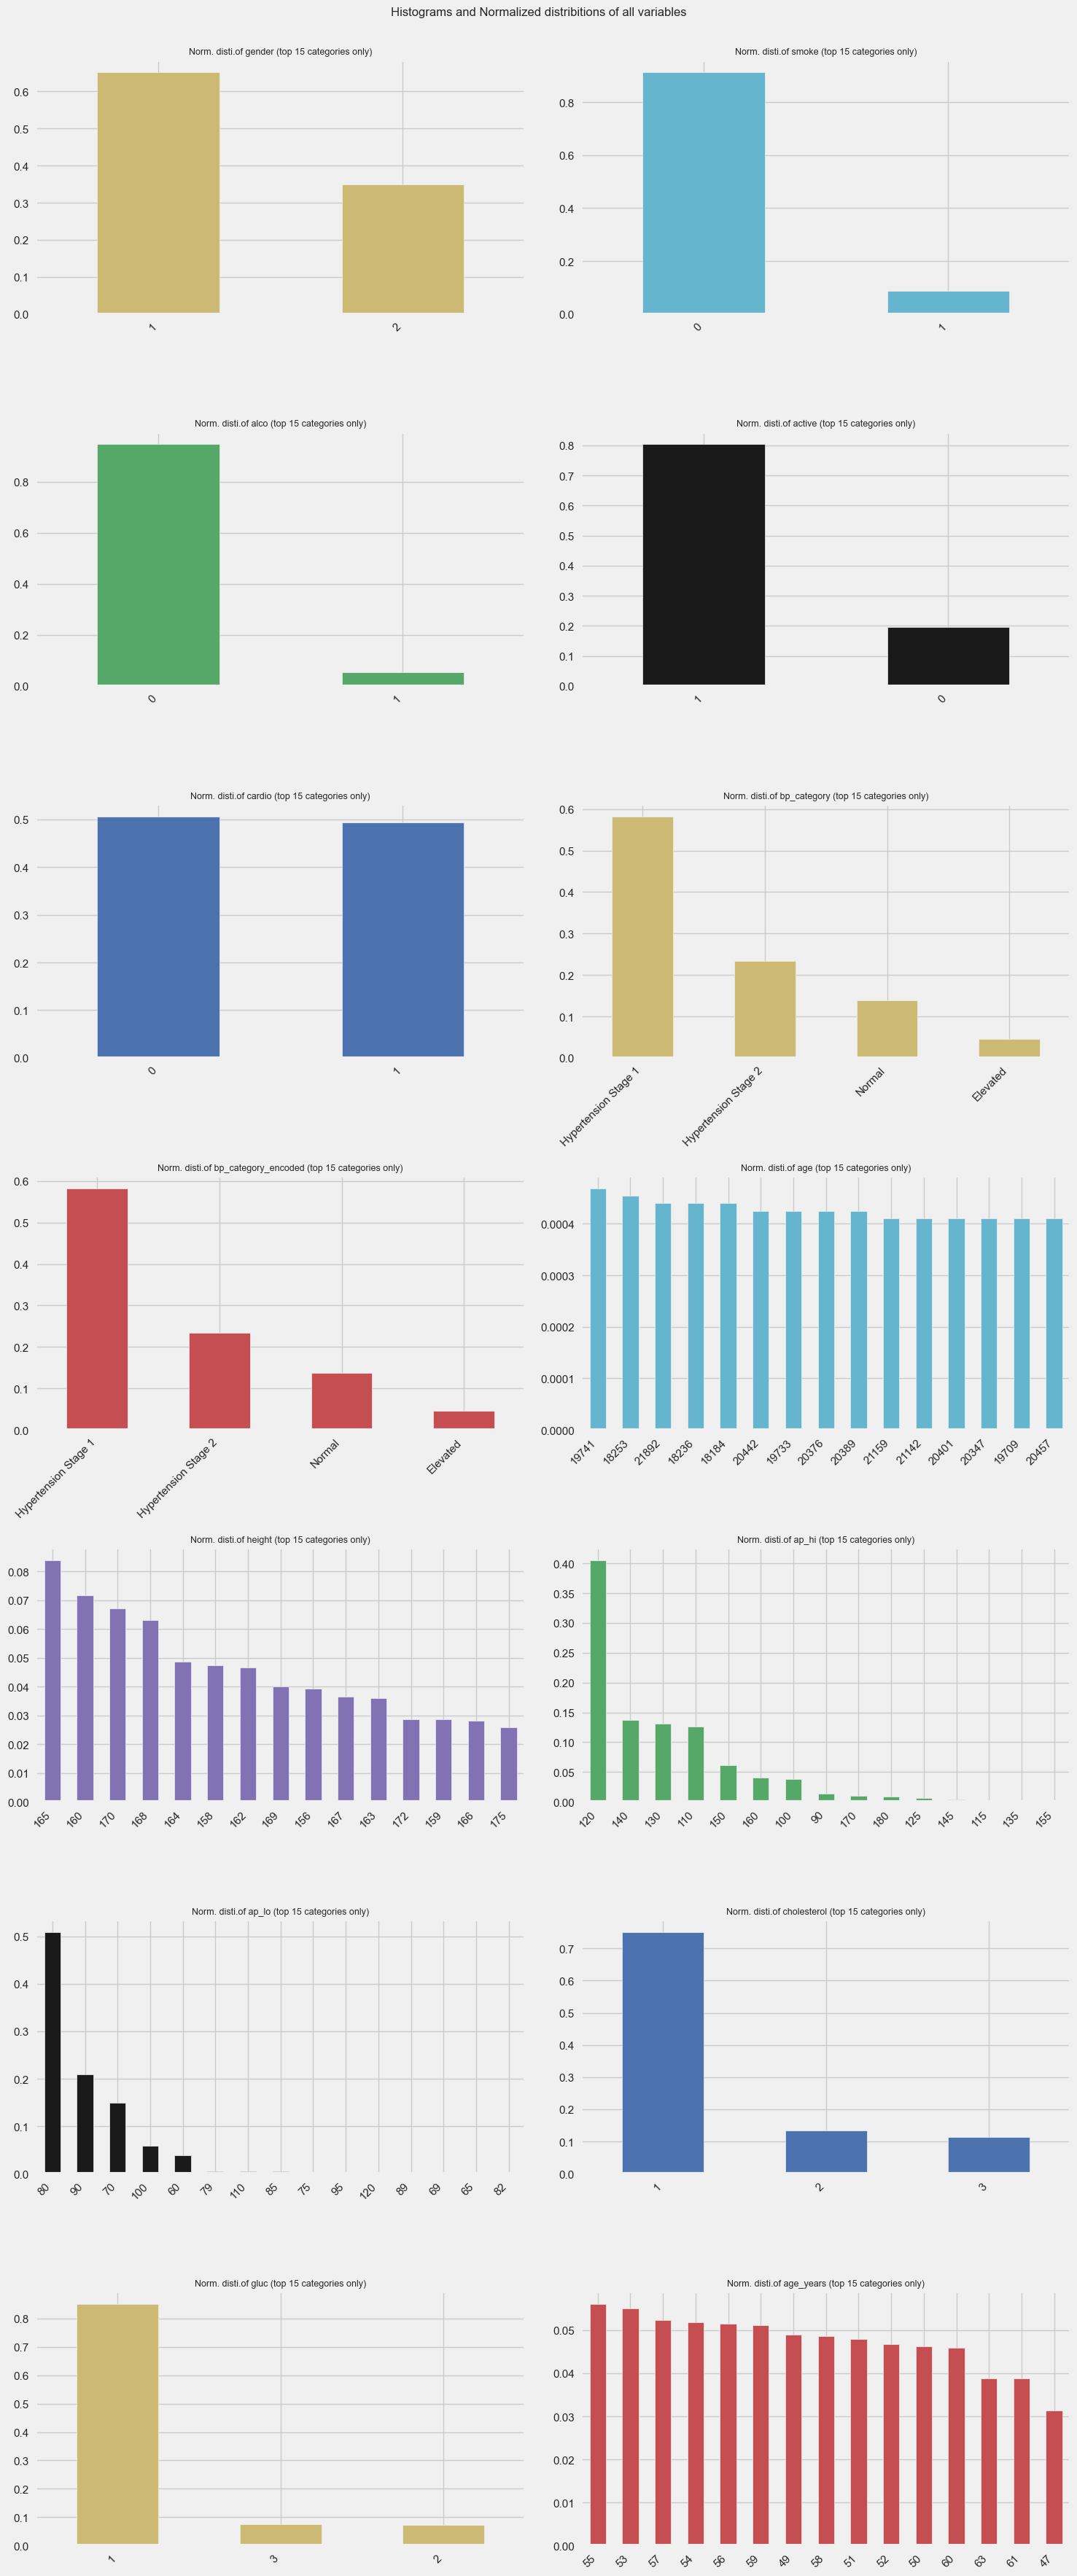

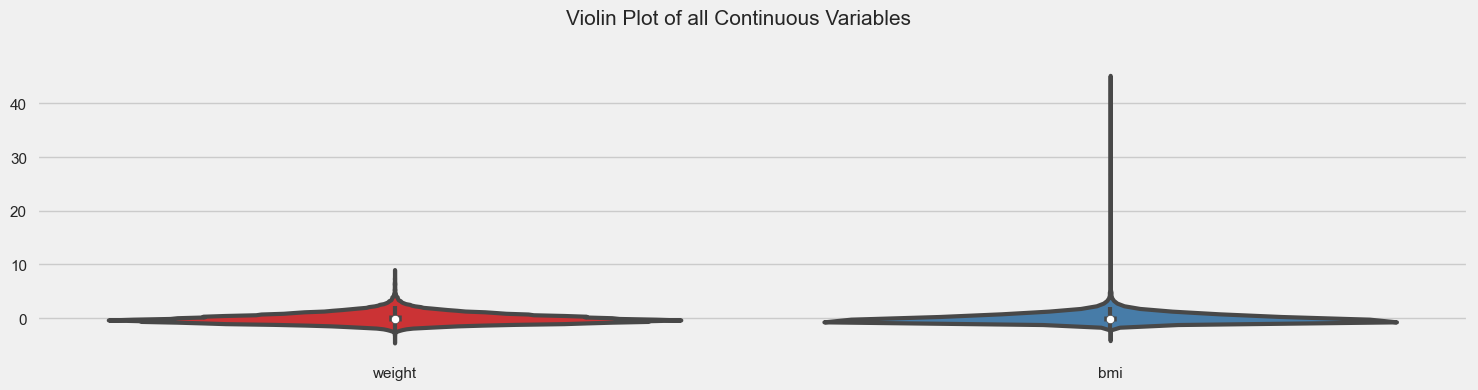

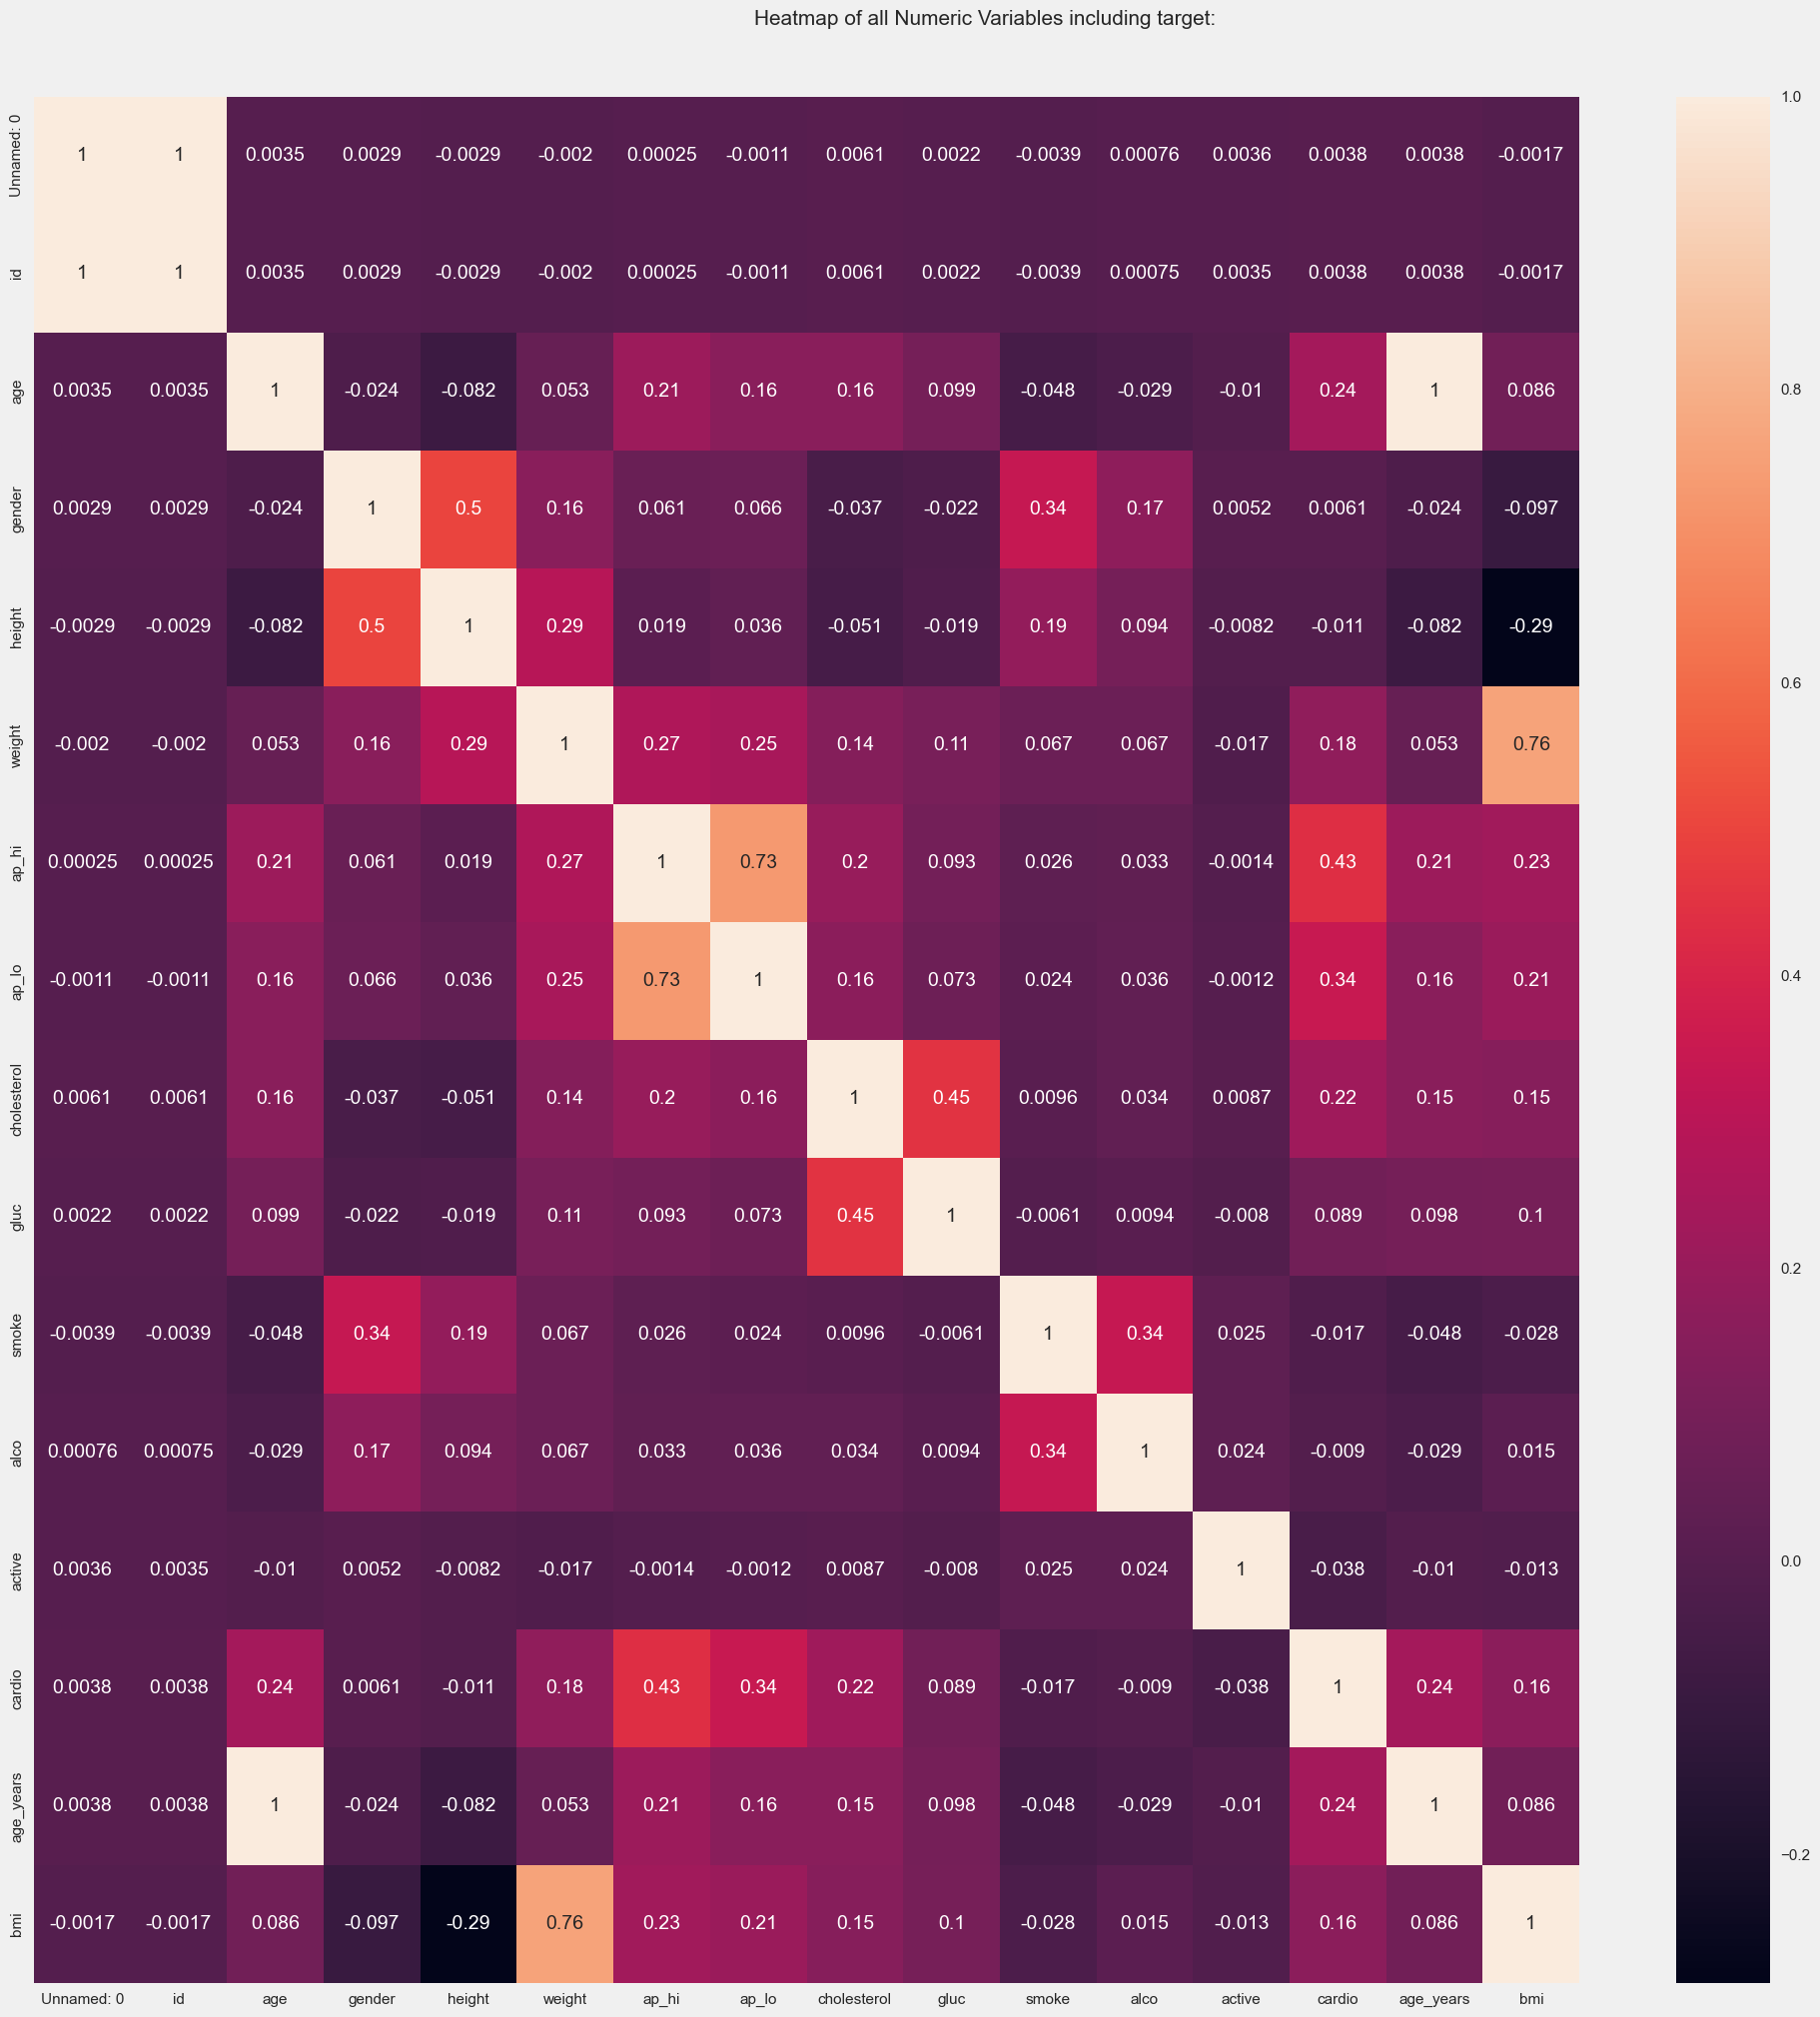

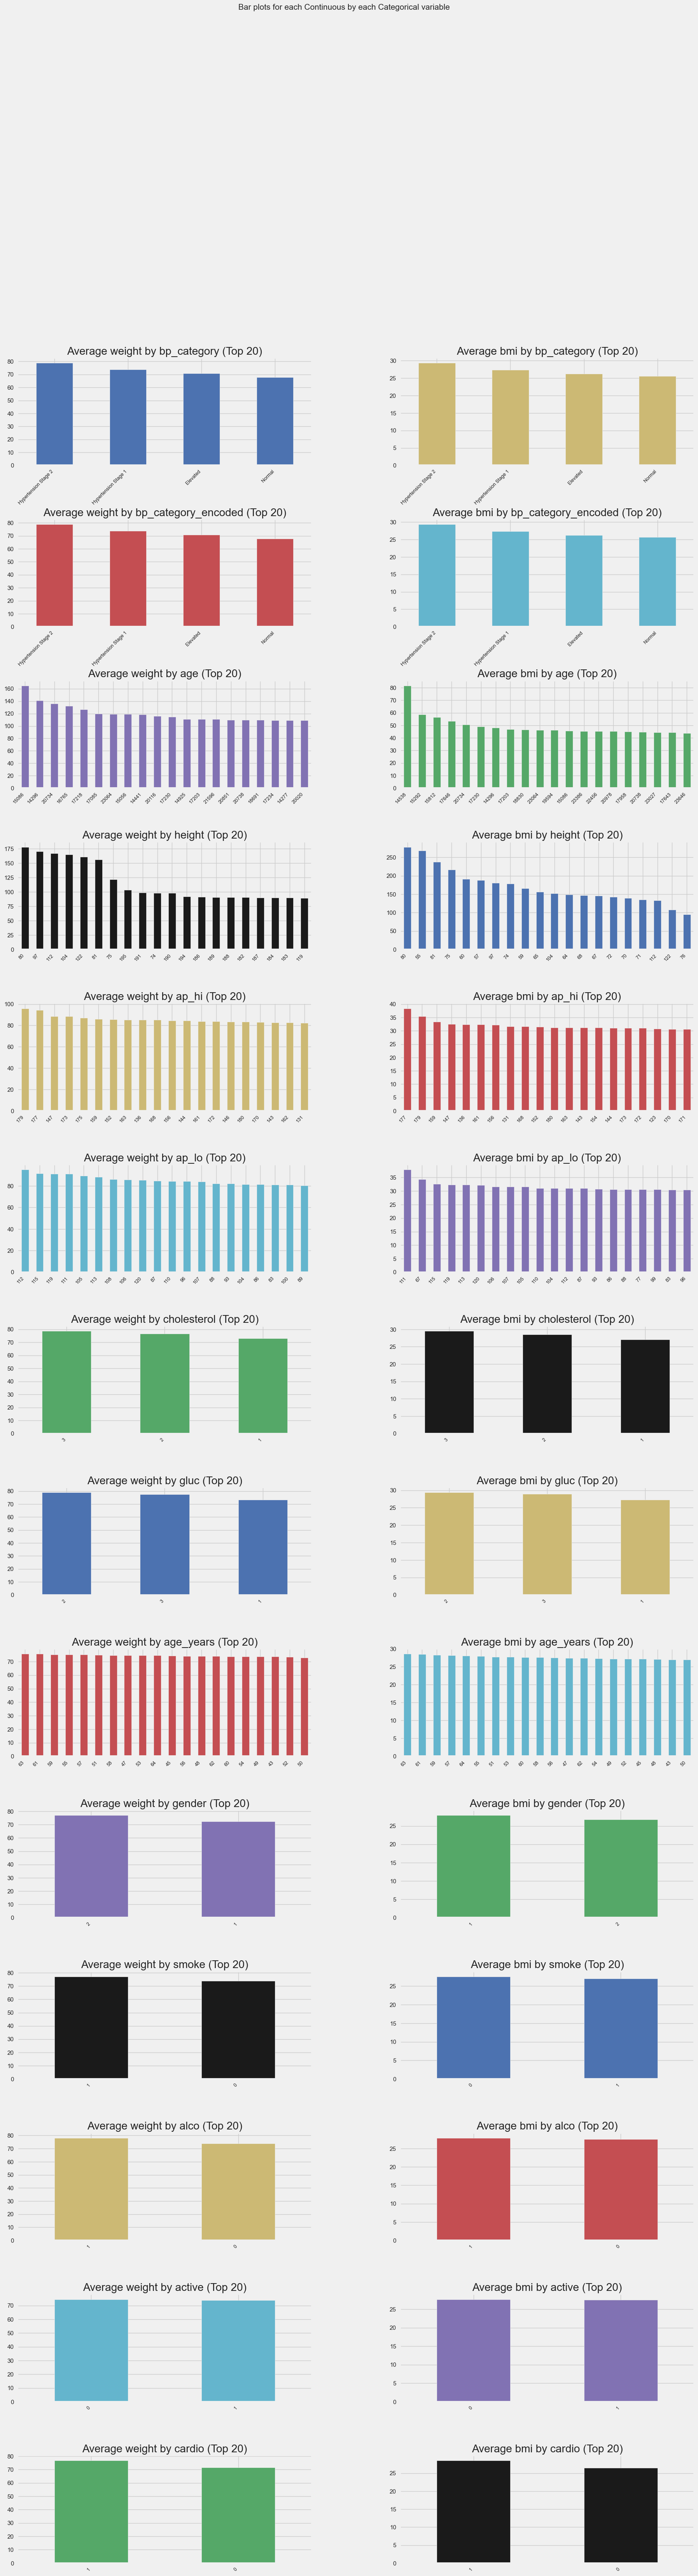

All Plots done
Time to run AutoViz = 31 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
# importing libraries for automated eda 
import matplotlib.pyplot as plt
%matplotlib inline
df_av = AV.AutoViz('dfav.csv') 

In [ ]:
# using automated eda library sweetviz
df_sv = sv.analyze(df)
df_sv.show_html()

In [ ]:
# pandas_profiling 
df_profile = ProfileReport(df)
df_profile.to_file('df_profile.html')

## Univariate Selection

In [29]:
# seperating dependent and independent data
X = df.drop('cardio', axis = 1)
X

id     age   gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393     2      168     62.0   110     80        1         1    
1          1  20228     1      156     85.0   140     90        3         1    
2          2  18857     1      165     64.0   130     70        3         1    
3          3  17623     2      169     82.0   150    100        1         1    
4          4  17474     1      156     56.0   100     60        1         1    
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240     2      168     76.0   120     80        1         1    
68201  99995  22601     1      158    126.0   140     90        2         2    
68202  99996  19066     2      183    105.0   180     90        3         1    
68203  99998  22431     1      163     72.0   135     80        1         2    
68204  99999  20540     1      170     72.0   120     80        2         1    

       smoke  alco  active  age_years     bmi         bp_category       \
0        0      0      1       50      21.967120  Hypertension Stage 1   
1        0      0      1       55      34.927679  Hypertension Stage 2   
2        0      0      0       51      23.507805  Hypertension Stage 1   
3        0      0      1       48      28.710479  Hypertension Stage 2   
4        0      0      0       47      23.011177                Normal   
...      ...   ...     ...        ...        ...                   ...   
68200    1      0      1       52      26.927438  Hypertension Stage 1   
68201    0      0      1       61      50.472681  Hypertension Stage 2   
68202    0      1      0       52      31.353579  Hypertension Stage 2   
68203    0      0      0       61      27.099251  Hypertension Stage 1   
68204    0      0      1       56      24.913495  Hypertension Stage 1   

       bp_category_encoded   
0      Hypertension Stage 1  
1      Hypertension Stage 2  
2      Hypertension Stage 1  
3      Hypertension Stage 2  
4                    Normal  
...                     ...  
68200  Hypertension Stage 1  
68201  Hypertension Stage 2  
68202  Hypertension Stage 2  
68203  Hypertension Stage 1  
68204  Hypertension Stage 1  

[68205 rows x 16 columns]

In [30]:
y = df['cardio']
y

0        0
1        1
2        1
3        1
4        0
        ..
68200    0
68201    1
68202    1
68203    1
68204    0
Name: cardio, Length: 68205, dtype: int64

## Handling categorical features

In [31]:
# checking for categorical features
categorical_features = [feature for feature in df if df[feature].dtypes == 'O']
categorical_features


['bp_category', 'bp_category_encoded']

In [32]:
# label encoding for handling categorial features
label_encoder = LabelEncoder()

In [33]:
df1 = df.copy()
df1['bp_category'] = label_encoder.fit_transform(df1['bp_category'])

In [34]:
df1['bp_category_encoded'] = label_encoder.fit_transform(df1['bp_category_encoded'])

In [35]:
df1

id     age   gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393     2      168     62.0   110     80        1         1    
1          1  20228     1      156     85.0   140     90        3         1    
2          2  18857     1      165     64.0   130     70        3         1    
3          3  17623     2      169     82.0   150    100        1         1    
4          4  17474     1      156     56.0   100     60        1         1    
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240     2      168     76.0   120     80        1         1    
68201  99995  22601     1      158    126.0   140     90        2         2    
68202  99996  19066     2      183    105.0   180     90        3         1    
68203  99998  22431     1      163     72.0   135     80        1         2    
68204  99999  20540     1      170     72.0   120     80        2         1    

       smoke  alco  active  cardio  age_years     bmi     bp_category  \
0        0      0      1       0       50      21.967120       1        
1        0      0      1       1       55      34.927679       2        
2        0      0      0       1       51      23.507805       1        
3        0      0      1       1       48      28.710479       2        
4        0      0      0       0       47      23.011177       3        
...      ...   ...     ...     ...        ...        ...          ...   
68200    1      0      1       0       52      26.927438       1        
68201    0      0      1       1       61      50.472681       2        
68202    0      1      0       1       52      31.353579       2        
68203    0      0      0       1       61      27.099251       1        
68204    0      0      1       0       56      24.913495       1        

       bp_category_encoded  
0               1           
1               2           
2               1           
3               2           
4               3           
...                    ...  
68200           1           
68201           2           
68202           2           
68203           1           
68204           1           

[68205 rows x 17 columns]

In [36]:
X1 = df1.drop('cardio', axis = 1)
y1 = df1['cardio']

In [ ]:
df_profile = ProfileReport(df1)
df_profile.to_file('df1_profile.html')

## Feature Selection

### SelectKBest technique 

In [37]:
# importing feature selection libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [38]:
# applying SelectKBest 
kbest = SelectKBest(score_func = chi2)
selected_kfeatures = kbest.fit(X1,y1)

In [39]:
# printing the scores of the features
selected_kfeatures.scores_

array([1.64741771e+04, 1.21995710e+06, 4.26994462e-01, 3.52730750e+00,
       5.94277659e+03, 2.58632396e+04, 8.25121346e+03, 1.12126971e+03,
       1.43608316e+02, 1.70782947e+01, 5.27499285e+00, 1.92907848e+01,
       3.37668303e+03, 2.38877684e+03, 3.57860550e+00, 3.57860550e+00])

In [40]:
# converting the scores in list form to dataframe
df_best = pd.DataFrame(selected_kfeatures.scores_, columns = ['score'])
df_best

score   
0   1.647418e+04
1   1.219957e+06
2   4.269945e-01
3   3.527308e+00
4   5.942777e+03
5   2.586324e+04
6   8.251213e+03
7   1.121270e+03
8   1.436083e+02
9   1.707829e+01
10  5.274993e+00
11  1.929078e+01
12  3.376683e+03
13  2.388777e+03
14  3.578606e+00
15  3.578606e+00

In [41]:
# taking the columns of the dataframe for later concatinating it with scores 
df_col = pd.DataFrame(X.columns)
df_col

0          
0                    id
1                   age
2                gender
3                height
4                weight
5                 ap_hi
6                 ap_lo
7           cholesterol
8                  gluc
9                 smoke
10                 alco
11               active
12            age_years
13                  bmi
14          bp_category
15  bp_category_encoded

In [42]:
# concatinating both dataframes
df_kbest = pd.concat([df_col,df_best],axis = 1)
df_kbest

0                score   
0                    id  1.647418e+04
1                   age  1.219957e+06
2                gender  4.269945e-01
3                height  3.527308e+00
4                weight  5.942777e+03
5                 ap_hi  2.586324e+04
6                 ap_lo  8.251213e+03
7           cholesterol  1.121270e+03
8                  gluc  1.436083e+02
9                 smoke  1.707829e+01
10                 alco  5.274993e+00
11               active  1.929078e+01
12            age_years  3.376683e+03
13                  bmi  2.388777e+03
14          bp_category  3.578606e+00
15  bp_category_encoded  3.578606e+00

In [44]:
# renaming the columns
df_kbest.columns=['Features','Scores']
# sorting the values in descending by score
df_kbest = df_kbest.sort_values(by=['Scores'],ascending = False)
df_kbest

Features           Scores   
1                   age  1.219957e+06
5                 ap_hi  2.586324e+04
0                    id  1.647418e+04
6                 ap_lo  8.251213e+03
4                weight  5.942777e+03
12            age_years  3.376683e+03
13                  bmi  2.388777e+03
7           cholesterol  1.121270e+03
8                  gluc  1.436083e+02
11               active  1.929078e+01
9                 smoke  1.707829e+01
10                 alco  5.274993e+00
14          bp_category  3.578606e+00
15  bp_category_encoded  3.578606e+00
3                height  3.527308e+00
2                gender  4.269945e-01

In [45]:
# taking the top 10 features
df_kbest = df_kbest.nlargest(10,'Scores')
df_kbest

Features       Scores   
1           age  1.219957e+06
5         ap_hi  2.586324e+04
0            id  1.647418e+04
6         ap_lo  8.251213e+03
4        weight  5.942777e+03
12    age_years  3.376683e+03
13          bmi  2.388777e+03
7   cholesterol  1.121270e+03
8          gluc  1.436083e+02
11       active  1.929078e+01

### Feature Importance technique

In [46]:
# importing libraries
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1,y1) # fitting the model

ExtraTreesClassifier()

In [47]:
# getting the feature importace of the features
model.feature_importances_

array([0.12084448, 0.13769533, 0.01500645, 0.10632875, 0.10981267,
       0.12348289, 0.0549042 , 0.03968545, 0.01667729, 0.00753807,
       0.00677385, 0.01075025, 0.06931197, 0.11541687, 0.03343635,
       0.03233515])

In [51]:
# converting the feature importance array into a dataframe and selecting the top 10 values
df_fi = pd.DataFrame(model.feature_importances_, index = X.columns)
df_fi = df_fi.nlargest(10, 0)
df_fi

0   
age          0.137695
ap_hi        0.123483
id           0.120844
bmi          0.115417
weight       0.109813
height       0.106329
age_years    0.069312
ap_lo        0.054904
cholesterol  0.039685
bp_category  0.033436

<Axes: >

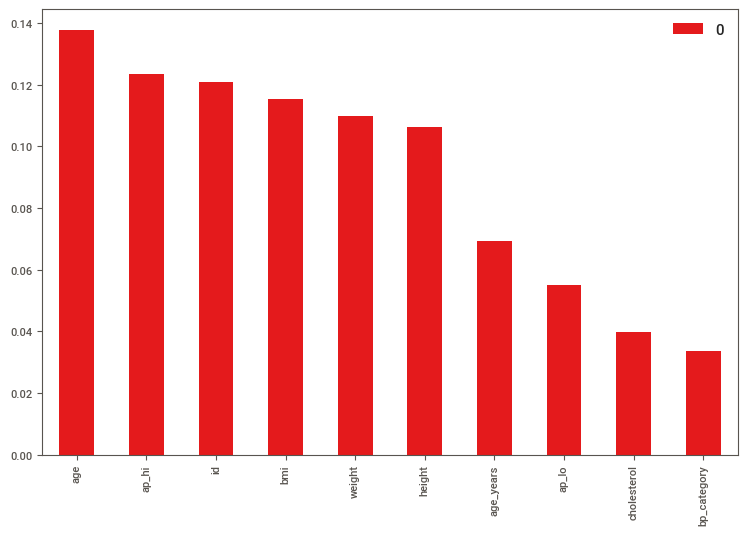

In [52]:
# plotting the feature importance
df_fi.plot(kind = 'bar')

### Correlation technique

In [53]:
cor = X.corr()
cor

id        age     gender    height    weight     ap_hi   \
id           1.000000  0.003512  0.002853 -0.002884 -0.002023  0.000251   
age          0.003512  1.000000 -0.023960 -0.082014  0.053321  0.211606   
gender       0.002853 -0.023960  1.000000  0.498323  0.156027  0.060722   
height      -0.002884 -0.082014  0.498323  1.000000  0.292679  0.018544   
weight      -0.002023  0.053321  0.156027  0.292679  1.000000  0.268289   
ap_hi        0.000251  0.211606  0.060722  0.018544  0.268289  1.000000   
ap_lo       -0.001090  0.155999  0.066126  0.035550  0.250184  0.731812   
cholesterol  0.006092  0.155131 -0.037397 -0.050957  0.139816  0.195330   
gluc         0.002225  0.098540 -0.021822 -0.019317  0.105734  0.093151   
smoke       -0.003925 -0.048078  0.337758  0.187543  0.067169  0.026032   
alco         0.000754 -0.028970  0.170719  0.094354  0.067177  0.032536   
active       0.003539 -0.010297  0.005206 -0.008241 -0.017443 -0.001409   
age_years    0.003810  0.999092 -0.024098 -0.081974  0.053199  0.211314   
bmi         -0.001720  0.085906 -0.096512 -0.288037  0.763079  0.230163   

               ap_lo   cholesterol    gluc      smoke     alco     active   \
id          -0.001090   0.006092    0.002225 -0.003925  0.000754  0.003539   
age          0.155999   0.155131    0.098540 -0.048078 -0.028970 -0.010297   
gender       0.066126  -0.037397   -0.021822  0.337758  0.170719  0.005206   
height       0.035550  -0.050957   -0.019317  0.187543  0.094354 -0.008241   
weight       0.250184   0.139816    0.105734  0.067169  0.067177 -0.017443   
ap_hi        0.731812   0.195330    0.093151  0.026032  0.032536 -0.001409   
ap_lo        1.000000   0.161637    0.073319  0.023836  0.036212 -0.001234   
cholesterol  0.161637   1.000000    0.450452  0.009570  0.034184  0.008658   
gluc         0.073319   0.450452    1.000000 -0.006109  0.009379 -0.008003   
smoke        0.023836   0.009570   -0.006109  1.000000  0.338226  0.024999   
alco         0.036212   0.034184    0.009379  0.338226  1.000000  0.024339   
active      -0.001234   0.008658   -0.008003  0.024999  0.024339  1.000000   
age_years    0.155777   0.154738    0.098212 -0.048089 -0.029052 -0.010385   
bmi          0.206944   0.145234    0.101253 -0.027544  0.014559 -0.013348   

             age_years     bmi    
id           0.003810  -0.001720  
age          0.999092   0.085906  
gender      -0.024098  -0.096512  
height      -0.081974  -0.288037  
weight       0.053199   0.763079  
ap_hi        0.211314   0.230163  
ap_lo        0.155777   0.206944  
cholesterol  0.154738   0.145234  
gluc         0.098212   0.101253  
smoke       -0.048089  -0.027544  
alco        -0.029052   0.014559  
active      -0.010385  -0.013348  
age_years    1.000000   0.085771  
bmi          0.085771   1.000000

In [55]:
# creating a function for checking the correlation of features
def correlation(dataset, threshold): 
    col_corr = set() # Set of all the names of correlated columns 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i] # getting the name of column 
                col_corr.add(colname) 
    return col_corr

In [56]:
# calling the function correlation
# taking threshold as 0.4
correlation(X,0.4)

{'age_years', 'ap_lo', 'bmi', 'gluc', 'height'}

### Mutual Information Classification

In [57]:
# importing library for mutual information classification
from sklearn.feature_selection import mutual_info_classif

In [58]:
df_mi = mutual_info_classif(X1,y1)

In [60]:
# converting df_mi into a dataframe and selecting top 10 features
df_mi = pd.DataFrame(df_mi, X.columns)
df_mi = df_mi.nlargest(10,0)
df_mi

0   
ap_hi                0.118372
bp_category_encoded  0.075684
bp_category          0.075492
ap_lo                0.072456
age                  0.034558
age_years            0.030947
cholesterol          0.028818
bmi                  0.023012
weight               0.017439
active               0.009383

# Conclusion:

By using these methods we can select features for our model.
Using Feature Selection can improve the accuracy of a model, for this purpose these techniques are useful.